In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/Students_Alcohol_Consumption/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
df = df.loc[:, 'school':'guardian']
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother


In [4]:
df.dropna(inplace = True)

In [5]:
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother
4,GP,F,16,U,GT3,T,3,3,other,other,home,father
...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother
392,MS,M,21,R,GT3,T,1,1,other,other,course,other
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother


In [7]:
for i in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',	'Fjob',	'reason',	'guardian']:
  print(f'{i}\t{len(df[i].unique())}\t{df[i].unique()}')

school	2	['GP' 'MS']
sex	2	['F' 'M']
address	2	['U' 'R']
famsize	2	['GT3' 'LE3']
Pstatus	2	['A' 'T']
Mjob	5	['at_home' 'health' 'other' 'services' 'teacher']
Fjob	5	['teacher' 'other' 'services' 'health' 'at_home']
reason	4	['course' 'other' 'home' 'reputation']
guardian	3	['mother' 'father' 'other']


In [8]:
ndf = pd.get_dummies(df, columns = ['school', 'sex', 'address', 'famsize', 'Pstatus'])
ndf

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T
0,18,4,4,at_home,teacher,course,mother,1,0,1,0,0,1,1,0,1,0
1,17,1,1,at_home,other,course,father,1,0,1,0,0,1,1,0,0,1
2,15,1,1,at_home,other,other,mother,1,0,1,0,0,1,0,1,0,1
3,15,4,2,health,services,home,mother,1,0,1,0,0,1,1,0,0,1
4,16,3,3,other,other,home,father,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,services,services,course,other,0,1,0,1,0,1,0,1,1,0
391,17,3,1,services,services,course,mother,0,1,0,1,0,1,0,1,0,1
392,21,1,1,other,other,course,other,0,1,0,1,1,0,1,0,0,1
393,18,3,2,services,other,course,mother,0,1,0,1,1,0,0,1,0,1


In [9]:
ndf

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T
0,18,4,4,at_home,teacher,course,mother,1,0,1,0,0,1,1,0,1,0
1,17,1,1,at_home,other,course,father,1,0,1,0,0,1,1,0,0,1
2,15,1,1,at_home,other,other,mother,1,0,1,0,0,1,0,1,0,1
3,15,4,2,health,services,home,mother,1,0,1,0,0,1,1,0,0,1
4,16,3,3,other,other,home,father,1,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,services,services,course,other,0,1,0,1,0,1,0,1,1,0
391,17,3,1,services,services,course,mother,0,1,0,1,0,1,0,1,0,1
392,21,1,1,other,other,course,other,0,1,0,1,1,0,1,0,0,1
393,18,3,2,services,other,course,mother,0,1,0,1,1,0,0,1,0,1


In [10]:
ndf.drop(['school_MS', 'sex_F', 'address_U', 'famsize_LE3', 'Pstatus_T'], axis = 1, inplace=True)

In [11]:
ndf

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,school_GP,sex_M,address_R,famsize_GT3,Pstatus_A
0,18,4,4,at_home,teacher,course,mother,1,0,0,1,1
1,17,1,1,at_home,other,course,father,1,0,0,1,0
2,15,1,1,at_home,other,other,mother,1,0,0,0,0
3,15,4,2,health,services,home,mother,1,0,0,1,0
4,16,3,3,other,other,home,father,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,services,services,course,other,0,1,0,0,1
391,17,3,1,services,services,course,mother,0,1,0,0,0
392,21,1,1,other,other,course,other,0,1,1,1,0
393,18,3,2,services,other,course,mother,0,1,1,0,0


In [12]:
ndf['NMjob'] = df['Mjob'].map({'at_home' : 0, 'health' : 1, 'services' : 2, 'teacher' : 3, 'other' : 4})
ndf['NFjob'] = df['Fjob'].map({'at_home' : 0, 'health' : 1, 'services' : 2, 'teacher' : 3, 'other' : 4})
ndf['Nreason'] = df['reason'].map({'course' : 0, 'home' : 1, 'reputation' : 2, 'other' : 3})
ndf['Nguardian'] = df['guardian'].map({'mother' : 0, 'father' : 1, 'other' : 2})

In [13]:
ndf

,age,Medu,Fedu,Mjob,Fjob,reason,guardian,school_GP,sex_M,address_R,famsize_GT3,Pstatus_A,NMjob,NFjob,Nreason,Nguardian
0,18,4,4,at_home,teacher,course,mother,1,0,0,1,1,0,3,0,0
1,17,1,1,at_home,other,course,father,1,0,0,1,0,0,4,0,1
2,15,1,1,at_home,other,other,mother,1,0,0,0,0,0,4,3,0
3,15,4,2,health,services,home,mother,1,0,0,1,0,1,2,1,0
4,16,3,3,other,other,home,father,1,0,0,1,0,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,services,services,course,other,0,1,0,0,1,2,2,0,2
391,17,3,1,services,services,course,mother,0,1,0,0,0,2,2,0,0
392,21,1,1,other,other,course,other,0,1,1,1,0,4,4,0,2
393,18,3,2,services,other,course,mother,0,1,1,0,0,2,4,0,0


In [14]:
ndf.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis = 1, inplace = True)
ndf

,age,Medu,Fedu,school_GP,sex_M,address_R,famsize_GT3,Pstatus_A,NMjob,NFjob,Nreason,Nguardian
0,18,4,4,1,0,0,1,1,0,3,0,0
1,17,1,1,1,0,0,1,0,0,4,0,1
2,15,1,1,1,0,0,0,0,0,4,3,0
3,15,4,2,1,0,0,1,0,1,2,1,0
4,16,3,3,1,0,0,1,0,4,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,0,1,0,0,1,2,2,0,2
391,17,3,1,0,1,0,0,0,2,2,0,0
392,21,1,1,0,1,1,1,0,4,4,0,2
393,18,3,2,0,1,1,0,0,2,4,0,0


In [15]:
def scal(num):
  return (num-np.min(df['age']))/(np.max(df['age'])-np.min(df['age']))

In [16]:
ndf['Nage'] = ndf['age'].apply(scal)
ndf

,age,Medu,Fedu,school_GP,sex_M,address_R,famsize_GT3,Pstatus_A,NMjob,NFjob,Nreason,Nguardian,Nage
0,18,4,4,1,0,0,1,1,0,3,0,0,0.428571
1,17,1,1,1,0,0,1,0,0,4,0,1,0.285714
2,15,1,1,1,0,0,0,0,0,4,3,0,0.000000
3,15,4,2,1,0,0,1,0,1,2,1,0,0.000000
4,16,3,3,1,0,0,1,0,4,4,1,1,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,0,1,0,0,1,2,2,0,2,0.714286
391,17,3,1,0,1,0,0,0,2,2,0,0,0.285714
392,21,1,1,0,1,1,1,0,4,4,0,2,0.857143
393,18,3,2,0,1,1,0,0,2,4,0,0,0.428571


In [17]:
ndf.drop('age', axis = 1, inplace = True)

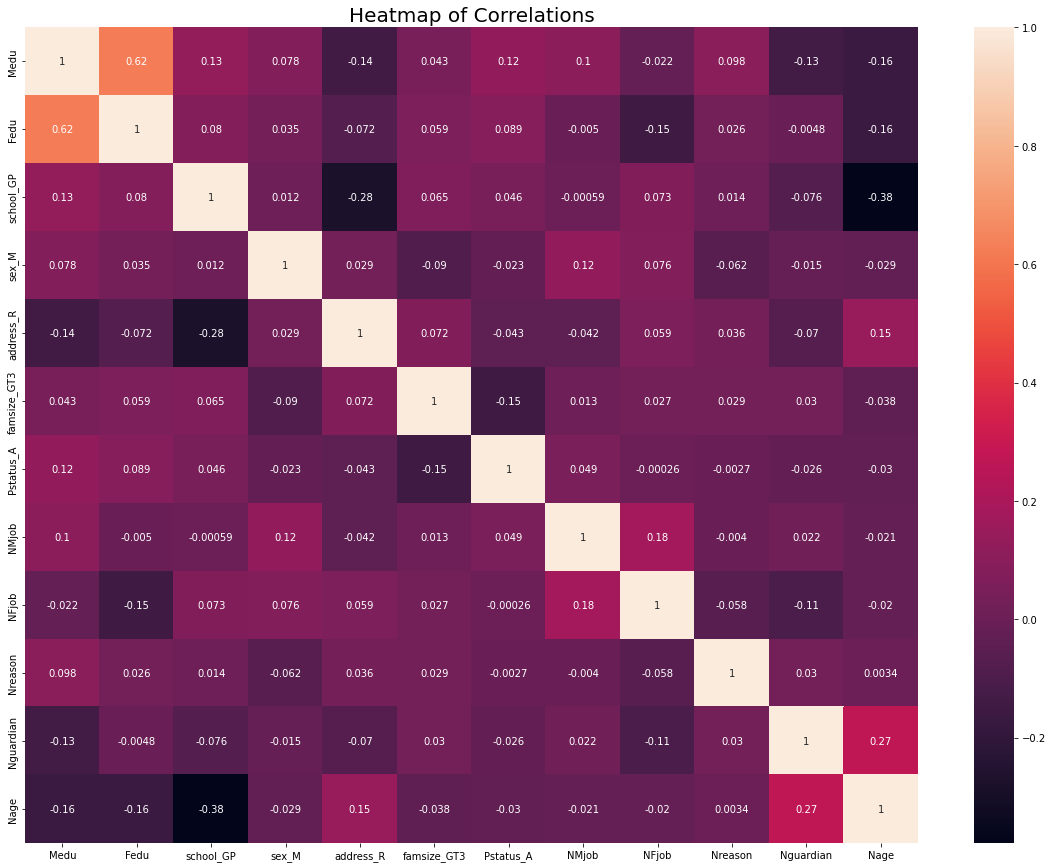

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(ndf.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=20)
plt.show()